<a href="https://colab.research.google.com/github/SagarRajoriya/CapGemini-Training/blob/main/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('house_price_extreme_messy_15654_rows.csv')

In [3]:
df = pd.DataFrame(data)

In [4]:
df.shape

(15654, 21)

In [5]:
df.columns

Index(['House_ID', 'Date_Sold', 'City', 'Area_sqft', 'Bedrooms', 'Bathrooms',
       'Garage', 'Year_Built', 'Price', 'Owner_Name', 'Contact', 'Email',
       'Property_Type', 'Furnished', 'Floor_No', 'Total_Floors', 'Latitude',
       'Longitude', 'Loan_Status', 'Registration_Price', 'Notes'],
      dtype='object')

In [6]:
df.rename(columns={'House_ID':'HouseID'}, inplace=True)

In [7]:
df.dtypes

,0
HouseID,object
Date_Sold,object
City,object
Area_sqft,object
Bedrooms,object
Bathrooms,int64
Garage,object
Year_Built,int64
Price,object
Owner_Name,object


In [8]:
df.info

<bound method DataFrame.info of       HouseID   Date_Sold          City Area_sqft Bedrooms  Bathrooms Garage  \
0       H5239  2020/02/21  Bhubaneshwar      1503        1          4    Yes   
1       H2788  2020-11-14  Bhubaneshwar       918        3          1     No   
2       H5208    29/11/20  Bhubaneshwar      1358      Two          2      N   
3       H1742  2022/03/21       Cuttack      1085    Three          4      N   
4       H4533  2023/10/25   Bhubaneswar      3292        1          3     No   
...       ...         ...           ...       ...      ...        ...    ...   
15649   H2162    12/07/22          Puri      2004      Two          3    Yes   
15650   H4306  2021-11-01  Bhubaneshwar      2950        4          4     No   
15651   H4935  2022-04-30          Puri      2377        2          1    YES   
15652   H1478  2020-04-02          BBSR       980        1          3      Y   
15653   H0928  2020-06-27       Khordha      2456        2          1    YES   

       Year_Built     Price Owner_Name  ...               Email Property_Type  \
0            1981      5.7M      Pooja  ...     pooja#gmail.com          Flat   
1            2014   8350753     Rakesh  ...  rakesh@outlook.com     Apartment   
2            1995      9.8M      Meena  ...     meena@gmail.com     Apartment   
3            2028   5679591       Arun  ...      arun@gmail.com          Flat   
4            2028   2054447     Rajesh  ...  rajesh@outlook.com           APT   
...           ...       ...        ...  ...                 ...           ...   
15649        2018      9.1M    Unknown  ...   unknown@gmail.com           APT   
15650        2028  12639088       Amit  ...          amit@gmail     Apartment   
15651        2028   6806979      Pooja  ...     pooja@gmail.com         Villa   
15652        1993     14.4M       Amit  ...          amit@gmail         Villa   
15653        1988   6474127       Amit  ...      amit@gmail.com         House   

      Furnished Floor_No Total_Floors  Latitude  Longitude  Loan_Status  \
0             N   Ground            5   20.3094    85.5065     Approved   
1            No        2            2   20.3553    86.3665      Pending   
2             Y        3            5   19.5662    86.4131     Rejected   
3             N   Ground            2   19.8848    86.0959      Pending   
4            No        1            6   20.2625    86.0394     Rejected   
...         ...      ...          ...       ...        ...          ...   
15649        No        3            5   20.4786    85.5982      Pending   
15650       Yes        1           10   20.2159    86.4082     Rejected   
15651        No        2           10   20.2710    86.3315      Pending   
15652        No        2            6   20.1363    86.0574     Approved   
15653        No        2            5   20.2862    85.8813     Rejected   

      Registration_Price             Notes  
0               13712835  Suspicious price  
1                6663623  Suspicious price  
2               14044602         Old house  
3               10877065         Old house  
4                2009594               NaN  
...                  ...               ...  
15649            3388721         Old house  
15650           10676143  Suspicious price  
15651            7258609         Old house  
15652            7512664     Good property  
15653            3894953  Suspicious price  

[15654 rows x 21 columns]>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15654 entries, 0 to 15653
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HouseID             15654 non-null  object 
 1   Date_Sold           15654 non-null  object 
 2   City                15654 non-null  object 
 3   Area_sqft           15599 non-null  object 
 4   Bedrooms            15654 non-null  object 
 5   Bathrooms           15654 non-null  int64  
 6   Garage              15654 non-null  object 
 7   Year_Built          15654 non-null  int64  
 8   Price               15578 non-null  object 
 9   Owner_Name          15654 non-null  object 
 10  Contact             15654 non-null  object 
 11  Email               15654 non-null  object 
 12  Property_Type       15654 non-null  object 
 13  Furnished           15654 non-null  object 
 14  Floor_No            15654 non-null  object 
 15  Total_Floors        15654 non-null  int64  
 16  Lati

In [10]:
df.describe()

,Bathrooms,Year_Built,Total_Floors,Latitude,Longitude,Registration_Price
count,15654.000000,15654.000000,15654.000000,15654.000000,15654.000000,1.565400e+04
mean,2.490290,2015.409799,8.021656,20.001870,85.997432,8.534412e+06
std,1.120596,15.799449,4.308147,0.288759,0.288138,3.742937e+06
min,1.000000,1980.000000,1.000000,19.500100,85.500200,2.000402e+06
25%,1.000000,2003.000000,4.000000,19.755000,85.749500,5.295635e+06
50%,2.000000,2028.000000,8.000000,20.002050,85.997400,8.568411e+06
75%,3.000000,2028.000000,12.000000,20.253275,86.246500,1.181919e+07
max,4.000000,2028.000000,15.000000,20.500000,86.500000,1.499864e+07


In [11]:
df.describe(include='object')

,HouseID,Date_Sold,City,Area_sqft,Bedrooms,Garage,Price,Owner_Name,Contact,Email,Property_Type,Furnished,Floor_No,Loan_Status,Notes
count,15654,15654,15654,15599,15654,15654,15578,15654,15654,15654,15654,15654,15654,15654,9360
unique,6782,5560,6,5243,6,5,11762,9,5322,45,5,4,6,3,3
top,H4757,06/02/25,Bhubaneswar,One Thousand,Three,Y,6.0M,Amit,0000000000,amit@gmail,House,Yes,3,Rejected,Good property
freq,9,12,2686,25,2678,3191,41,1824,5231,634,3252,3981,2636,5226,3164


In [12]:
df.isnull().sum() #It gives us the count of NULL Values

,0
HouseID,0
Date_Sold,0
City,0
Area_sqft,55
Bedrooms,0
Bathrooms,0
Garage,0
Year_Built,0
Price,76
Owner_Name,0


In [13]:
df['Notes'].isnull()

,Notes
0,False
1,False
2,False
3,False
4,True
...,...
15649,False
15650,False
15651,False
15652,False


In [14]:
df['Notes'].isnull().sum()

np.int64(6294)

In [15]:
df['Notes'].isnull().sum()/len(df['Notes'])*100

np.float64(40.20697585281717)

In [16]:
df.drop(['Owner_Name','Notes','Contact','Email'],axis=1,inplace=True)

In [17]:
df['Date_Sold']=pd.to_datetime(df['Date_Sold'],errors='coerce')

In [18]:
df['Day']=df['Date_Sold'].dt.day

In [19]:
df

,HouseID,Date_Sold,City,Area_sqft,Bedrooms,Bathrooms,Garage,Year_Built,Price,Property_Type,Furnished,Floor_No,Total_Floors,Latitude,Longitude,Loan_Status,Registration_Price,Day
0,H5239,2020-02-21,Bhubaneshwar,1503,1,4,Yes,1981,5.7M,Flat,N,Ground,5,20.3094,85.5065,Approved,13712835,21.0
1,H2788,NaT,Bhubaneshwar,918,3,1,No,2014,8350753,Apartment,No,2,2,20.3553,86.3665,Pending,6663623,NaN
2,H5208,NaT,Bhubaneshwar,1358,Two,2,N,1995,9.8M,Apartment,Y,3,5,19.5662,86.4131,Rejected,14044602,NaN
3,H1742,2022-03-21,Cuttack,1085,Three,4,N,2028,5679591,Flat,N,Ground,2,19.8848,86.0959,Pending,10877065,21.0
4,H4533,2023-10-25,Bhubaneswar,3292,1,3,No,2028,2054447,APT,No,1,6,20.2625,86.0394,Rejected,2009594,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15649,H2162,NaT,Puri,2004,Two,3,Yes,2018,9.1M,APT,No,3,5,20.4786,85.5982,Pending,3388721,NaN
15650,H4306,NaT,Bhubaneshwar,2950,4,4,No,2028,12639088,Apartment,Yes,1,10,20.2159,86.4082,Rejected,10676143,NaN
15651,H4935,NaT,Puri,2377,2,1,YES,2028,6806979,Villa,No,2,10,20.2710,86.3315,Pending,7258609,NaN
15652,H1478,NaT,BBSR,980,1,3,Y,1993,14.4M,Villa,No,2,6,20.1363,86.0574,Approved,7512664,NaN


In [20]:
df.drop(columns='Day')

,HouseID,Date_Sold,City,Area_sqft,Bedrooms,Bathrooms,Garage,Year_Built,Price,Property_Type,Furnished,Floor_No,Total_Floors,Latitude,Longitude,Loan_Status,Registration_Price
0,H5239,2020-02-21,Bhubaneshwar,1503,1,4,Yes,1981,5.7M,Flat,N,Ground,5,20.3094,85.5065,Approved,13712835
1,H2788,NaT,Bhubaneshwar,918,3,1,No,2014,8350753,Apartment,No,2,2,20.3553,86.3665,Pending,6663623
2,H5208,NaT,Bhubaneshwar,1358,Two,2,N,1995,9.8M,Apartment,Y,3,5,19.5662,86.4131,Rejected,14044602
3,H1742,2022-03-21,Cuttack,1085,Three,4,N,2028,5679591,Flat,N,Ground,2,19.8848,86.0959,Pending,10877065
4,H4533,2023-10-25,Bhubaneswar,3292,1,3,No,2028,2054447,APT,No,1,6,20.2625,86.0394,Rejected,2009594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15649,H2162,NaT,Puri,2004,Two,3,Yes,2018,9.1M,APT,No,3,5,20.4786,85.5982,Pending,3388721
15650,H4306,NaT,Bhubaneshwar,2950,4,4,No,2028,12639088,Apartment,Yes,1,10,20.2159,86.4082,Rejected,10676143
15651,H4935,NaT,Puri,2377,2,1,YES,2028,6806979,Villa,No,2,10,20.2710,86.3315,Pending,7258609
15652,H1478,NaT,BBSR,980,1,3,Y,1993,14.4M,Villa,No,2,6,20.1363,86.0574,Approved,7512664


In [21]:
df['Day']=df['Date_Sold'].dt.day

In [22]:
df['Month']=df['Date_Sold'].dt.month

In [23]:
df['Sold_Year']=df['Date_Sold'].dt.year

In [24]:
df['Area_sqft'].unique()

array(['1503', '918', '1358', ..., '2928 sqft', '609', '1815 sqft'],
      dtype=object)

In [25]:
df

,HouseID,Date_Sold,City,Area_sqft,Bedrooms,Bathrooms,Garage,Year_Built,Price,Property_Type,Furnished,Floor_No,Total_Floors,Latitude,Longitude,Loan_Status,Registration_Price,Day,Month,Sold_Year
0,H5239,2020-02-21,Bhubaneshwar,1503,1,4,Yes,1981,5.7M,Flat,N,Ground,5,20.3094,85.5065,Approved,13712835,21.0,2.0,2020.0
1,H2788,NaT,Bhubaneshwar,918,3,1,No,2014,8350753,Apartment,No,2,2,20.3553,86.3665,Pending,6663623,NaN,NaN,NaN
2,H5208,NaT,Bhubaneshwar,1358,Two,2,N,1995,9.8M,Apartment,Y,3,5,19.5662,86.4131,Rejected,14044602,NaN,NaN,NaN
3,H1742,2022-03-21,Cuttack,1085,Three,4,N,2028,5679591,Flat,N,Ground,2,19.8848,86.0959,Pending,10877065,21.0,3.0,2022.0
4,H4533,2023-10-25,Bhubaneswar,3292,1,3,No,2028,2054447,APT,No,1,6,20.2625,86.0394,Rejected,2009594,25.0,10.0,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15649,H2162,NaT,Puri,2004,Two,3,Yes,2018,9.1M,APT,No,3,5,20.4786,85.5982,Pending,3388721,NaN,NaN,NaN
15650,H4306,NaT,Bhubaneshwar,2950,4,4,No,2028,12639088,Apartment,Yes,1,10,20.2159,86.4082,Rejected,10676143,NaN,NaN,NaN
15651,H4935,NaT,Puri,2377,2,1,YES,2028,6806979,Villa,No,2,10,20.2710,86.3315,Pending,7258609,NaN,NaN,NaN
15652,H1478,NaT,BBSR,980,1,3,Y,1993,14.4M,Villa,No,2,6,20.1363,86.0574,Approved,7512664,NaN,NaN,NaN


In [26]:
df['Area_sqft']=df['Area_sqft'].str.extract('(\d+)')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2184907609.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['Area_sqft']=df['Area_sqft'].str.extract('(\d+)')


In [27]:
df['Area_sqft'].astype(float).isnull().sum()/len(df['Area_sqft'])*100

np.float64(0.5110514884374601)

<Axes: xlabel='Area_sqft', ylabel='Count'>

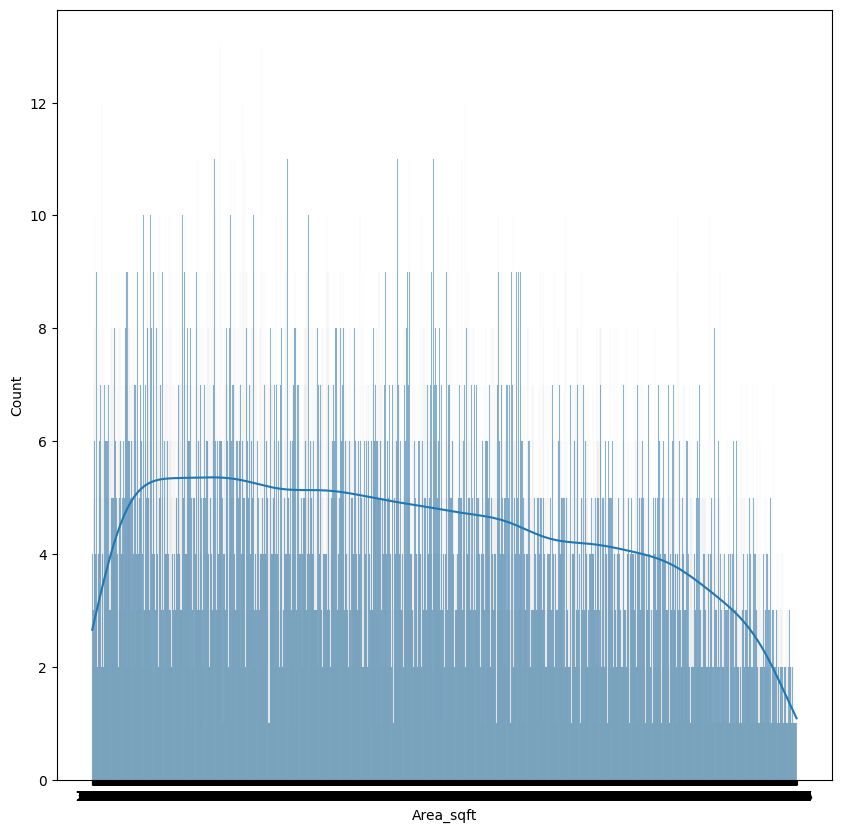

In [28]:

plt.figure(figsize=(10,10))
sns.histplot(df['Area_sqft'].dropna(),kde=True,bins=100) #KDE stands for kernal Density Estimation

In [29]:
df['Bedrooms'] = df['Bedrooms'].replace('Two','2')

In [30]:
df['Bedrooms'] = df['Bedrooms'].replace('Three','3')

In [31]:
df

,HouseID,Date_Sold,City,Area_sqft,Bedrooms,Bathrooms,Garage,Year_Built,Price,Property_Type,Furnished,Floor_No,Total_Floors,Latitude,Longitude,Loan_Status,Registration_Price,Day,Month,Sold_Year
0,H5239,2020-02-21,Bhubaneshwar,1503,1,4,Yes,1981,5.7M,Flat,N,Ground,5,20.3094,85.5065,Approved,13712835,21.0,2.0,2020.0
1,H2788,NaT,Bhubaneshwar,918,3,1,No,2014,8350753,Apartment,No,2,2,20.3553,86.3665,Pending,6663623,NaN,NaN,NaN
2,H5208,NaT,Bhubaneshwar,1358,2,2,N,1995,9.8M,Apartment,Y,3,5,19.5662,86.4131,Rejected,14044602,NaN,NaN,NaN
3,H1742,2022-03-21,Cuttack,1085,3,4,N,2028,5679591,Flat,N,Ground,2,19.8848,86.0959,Pending,10877065,21.0,3.0,2022.0
4,H4533,2023-10-25,Bhubaneswar,3292,1,3,No,2028,2054447,APT,No,1,6,20.2625,86.0394,Rejected,2009594,25.0,10.0,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15649,H2162,NaT,Puri,2004,2,3,Yes,2018,9.1M,APT,No,3,5,20.4786,85.5982,Pending,3388721,NaN,NaN,NaN
15650,H4306,NaT,Bhubaneshwar,2950,4,4,No,2028,12639088,Apartment,Yes,1,10,20.2159,86.4082,Rejected,10676143,NaN,NaN,NaN
15651,H4935,NaT,Puri,2377,2,1,YES,2028,6806979,Villa,No,2,10,20.2710,86.3315,Pending,7258609,NaN,NaN,NaN
15652,H1478,NaT,BBSR,980,1,3,Y,1993,14.4M,Villa,No,2,6,20.1363,86.0574,Approved,7512664,NaN,NaN,NaN


In [32]:
df.isnull().sum()

,0
HouseID,0
Date_Sold,10532
City,0
Area_sqft,80
Bedrooms,0
Bathrooms,0
Garage,0
Year_Built,0
Price,76
Property_Type,0


In [33]:
df['Bedrooms'].isna().sum()

np.int64(0)

In [34]:
df['City'].unique()

array(['Bhubaneshwar', 'Cuttack', 'Bhubaneswar', 'Puri', 'BBSR',
       'Khordha'], dtype=object)

In [35]:
df['City'].replace({'Bhubaneshwar':'Bhubaneswar','BBSR':'Bhubaneswar'})

,City
0,Bhubaneswar
1,Bhubaneswar
2,Bhubaneswar
3,Cuttack
4,Bhubaneswar
...,...
15649,Puri
15650,Bhubaneswar
15651,Puri
15652,Bhubaneswar


In [36]:
df['City'].unique

<bound method Series.unique of 0        Bhubaneshwar
1        Bhubaneshwar
2        Bhubaneshwar
3             Cuttack
4         Bhubaneswar
             ...     
15649            Puri
15650    Bhubaneshwar
15651            Puri
15652            BBSR
15653         Khordha
Name: City, Length: 15654, dtype: object>

In [37]:
df['City'].unique()

array(['Bhubaneshwar', 'Cuttack', 'Bhubaneswar', 'Puri', 'BBSR',
       'Khordha'], dtype=object)

In [38]:
df['City'].replace({'Bhubaneshwar':'Bhubaneswar','BBSR':'Bhubaneswar'},inplace = True)

In [39]:
df['City'].unique()

array(['Bhubaneswar', 'Cuttack', 'Puri', 'Khordha'], dtype=object)

In [40]:
df['Garage'].unique()

array(['Yes', 'No', 'N', 'YES', 'Y'], dtype=object)

In [41]:
df['Garage'].replace({'Y':'Yes','N':'No','YES':'Yes'},inplace=True)

/tmp/ipython-input-1177096423.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Garage'].replace({'Y':'Yes','N':'No','YES':'Yes'},inplace=True)


In [42]:
df['Garage'].unique()

array(['Yes', 'No'], dtype=object)

In [43]:
df['Floor_No'].unique()

array(['Ground', '2', '3', '1', 'G', '0'], dtype=object)

In [44]:
df['Floor_No'].replace({'Ground':'0','G':'0'},inplace=True)

/tmp/ipython-input-3584151764.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Floor_No'].replace({'Ground':'0','G':'0'},inplace=True)


In [45]:
df['Floor_No'].unique()

array(['0', '2', '3', '1'], dtype=object)

In [46]:
df['Property_Type'].unique()

array(['Flat', 'Apartment', 'APT', 'House', 'Villa'], dtype=object)

In [47]:
df['Property_Type'].replace({'APT':'Apartment'},inplace=True)

/tmp/ipython-input-4240856894.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Property_Type'].replace({'APT':'Apartment'},inplace=True)


In [48]:
df['Property_Type'].unique()

array(['Flat', 'Apartment', 'House', 'Villa'], dtype=object)

In [49]:
df

,HouseID,Date_Sold,City,Area_sqft,Bedrooms,Bathrooms,Garage,Year_Built,Price,Property_Type,Furnished,Floor_No,Total_Floors,Latitude,Longitude,Loan_Status,Registration_Price,Day,Month,Sold_Year
0,H5239,2020-02-21,Bhubaneswar,1503,1,4,Yes,1981,5.7M,Flat,N,0,5,20.3094,85.5065,Approved,13712835,21.0,2.0,2020.0
1,H2788,NaT,Bhubaneswar,918,3,1,No,2014,8350753,Apartment,No,2,2,20.3553,86.3665,Pending,6663623,NaN,NaN,NaN
2,H5208,NaT,Bhubaneswar,1358,2,2,No,1995,9.8M,Apartment,Y,3,5,19.5662,86.4131,Rejected,14044602,NaN,NaN,NaN
3,H1742,2022-03-21,Cuttack,1085,3,4,No,2028,5679591,Flat,N,0,2,19.8848,86.0959,Pending,10877065,21.0,3.0,2022.0
4,H4533,2023-10-25,Bhubaneswar,3292,1,3,No,2028,2054447,Apartment,No,1,6,20.2625,86.0394,Rejected,2009594,25.0,10.0,2023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15649,H2162,NaT,Puri,2004,2,3,Yes,2018,9.1M,Apartment,No,3,5,20.4786,85.5982,Pending,3388721,NaN,NaN,NaN
15650,H4306,NaT,Bhubaneswar,2950,4,4,No,2028,12639088,Apartment,Yes,1,10,20.2159,86.4082,Rejected,10676143,NaN,NaN,NaN
15651,H4935,NaT,Puri,2377,2,1,Yes,2028,6806979,Villa,No,2,10,20.2710,86.3315,Pending,7258609,NaN,NaN,NaN
15652,H1478,NaT,Bhubaneswar,980,1,3,Yes,1993,14.4M,Villa,No,2,6,20.1363,86.0574,Approved,7512664,NaN,NaN,NaN


In [50]:
df['Furnished'].unique(
)

array(['N', 'No', 'Y', 'Yes'], dtype=object)

In [51]:
df['Furnished'].replace({'N':'No','Y':'Yes'},inplace=True)

/tmp/ipython-input-1042419329.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Furnished'].replace({'N':'No','Y':'Yes'},inplace=True)


In [52]:
df.drop(columns = ['Day','Month','Sold_Year'],inplace=True)

In [53]:
df['Date_Sold']=pd.to_datetime(df['Date_Sold'],format = 'mixed',errors='coerce')

In [54]:
df

,HouseID,Date_Sold,City,Area_sqft,Bedrooms,Bathrooms,Garage,Year_Built,Price,Property_Type,Furnished,Floor_No,Total_Floors,Latitude,Longitude,Loan_Status,Registration_Price
0,H5239,2020-02-21,Bhubaneswar,1503,1,4,Yes,1981,5.7M,Flat,No,0,5,20.3094,85.5065,Approved,13712835
1,H2788,NaT,Bhubaneswar,918,3,1,No,2014,8350753,Apartment,No,2,2,20.3553,86.3665,Pending,6663623
2,H5208,NaT,Bhubaneswar,1358,2,2,No,1995,9.8M,Apartment,Yes,3,5,19.5662,86.4131,Rejected,14044602
3,H1742,2022-03-21,Cuttack,1085,3,4,No,2028,5679591,Flat,No,0,2,19.8848,86.0959,Pending,10877065
4,H4533,2023-10-25,Bhubaneswar,3292,1,3,No,2028,2054447,Apartment,No,1,6,20.2625,86.0394,Rejected,2009594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15649,H2162,NaT,Puri,2004,2,3,Yes,2018,9.1M,Apartment,No,3,5,20.4786,85.5982,Pending,3388721
15650,H4306,NaT,Bhubaneswar,2950,4,4,No,2028,12639088,Apartment,Yes,1,10,20.2159,86.4082,Rejected,10676143
15651,H4935,NaT,Puri,2377,2,1,Yes,2028,6806979,Villa,No,2,10,20.2710,86.3315,Pending,7258609
15652,H1478,NaT,Bhubaneswar,980,1,3,Yes,1993,14.4M,Villa,No,2,6,20.1363,86.0574,Approved,7512664


In [55]:
LE = LabelEncoder()
df['Garage_Labeled'] = LE.fit_transform(df['Garage'])
df['Furnished_Labeled'] = LE.fit_transform(df['Furnished'])
df

,HouseID,Date_Sold,City,Area_sqft,Bedrooms,Bathrooms,Garage,Year_Built,Price,Property_Type,Furnished,Floor_No,Total_Floors,Latitude,Longitude,Loan_Status,Registration_Price,Garage_Labeled,Furnished_Labeled
0,H5239,2020-02-21,Bhubaneswar,1503,1,4,Yes,1981,5.7M,Flat,No,0,5,20.3094,85.5065,Approved,13712835,1,0
1,H2788,NaT,Bhubaneswar,918,3,1,No,2014,8350753,Apartment,No,2,2,20.3553,86.3665,Pending,6663623,0,0
2,H5208,NaT,Bhubaneswar,1358,2,2,No,1995,9.8M,Apartment,Yes,3,5,19.5662,86.4131,Rejected,14044602,0,1
3,H1742,2022-03-21,Cuttack,1085,3,4,No,2028,5679591,Flat,No,0,2,19.8848,86.0959,Pending,10877065,0,0
4,H4533,2023-10-25,Bhubaneswar,3292,1,3,No,2028,2054447,Apartment,No,1,6,20.2625,86.0394,Rejected,2009594,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15649,H2162,NaT,Puri,2004,2,3,Yes,2018,9.1M,Apartment,No,3,5,20.4786,85.5982,Pending,3388721,1,0
15650,H4306,NaT,Bhubaneswar,2950,4,4,No,2028,12639088,Apartment,Yes,1,10,20.2159,86.4082,Rejected,10676143,0,1
15651,H4935,NaT,Puri,2377,2,1,Yes,2028,6806979,Villa,No,2,10,20.2710,86.3315,Pending,7258609,1,0
15652,H1478,NaT,Bhubaneswar,980,1,3,Yes,1993,14.4M,Villa,No,2,6,20.1363,86.0574,Approved,7512664,1,0


In [56]:
OHE = OneHotEncoder(sparse_output = False)
Data = OHE.fit_transform(df[['Property_Type']])
Name = OHE.get_feature_names_out(['Property_Type'])
df_OHE = pd.DataFrame(Data,columns=Name)
df_OHE

,Property_Type_Apartment,Property_Type_Flat,Property_Type_House,Property_Type_Villa
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
15649,1.0,0.0,0.0,0.0
15650,1.0,0.0,0.0,0.0
15651,0.0,0.0,0.0,1.0
15652,0.0,0.0,0.0,1.0


In [57]:
DataLoan = OHE.fit_transform(df[['Loan_Status']])
NameLoan = OHE.get_feature_names_out(['Loan_Status'])
df_OHELoan = pd.DataFrame(DataLoan,columns=NameLoan)
df_OHELoan

,Loan_Status_Approved,Loan_Status_Pending,Loan_Status_Rejected
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
...,...,...,...
15649,0.0,1.0,0.0
15650,0.0,0.0,1.0
15651,0.0,1.0,0.0
15652,1.0,0.0,0.0


In [58]:
df = pd.concat([df,df_OHE,df_OHELoan],axis=1)
df

,HouseID,Date_Sold,City,Area_sqft,Bedrooms,Bathrooms,Garage,Year_Built,Price,Property_Type,...,Registration_Price,Garage_Labeled,Furnished_Labeled,Property_Type_Apartment,Property_Type_Flat,Property_Type_House,Property_Type_Villa,Loan_Status_Approved,Loan_Status_Pending,Loan_Status_Rejected
0,H5239,2020-02-21,Bhubaneswar,1503,1,4,Yes,1981,5.7M,Flat,...,13712835,1,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,H2788,NaT,Bhubaneswar,918,3,1,No,2014,8350753,Apartment,...,6663623,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,H5208,NaT,Bhubaneswar,1358,2,2,No,1995,9.8M,Apartment,...,14044602,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,H1742,2022-03-21,Cuttack,1085,3,4,No,2028,5679591,Flat,...,10877065,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,H4533,2023-10-25,Bhubaneswar,3292,1,3,No,2028,2054447,Apartment,...,2009594,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15649,H2162,NaT,Puri,2004,2,3,Yes,2018,9.1M,Apartment,...,3388721,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
15650,H4306,NaT,Bhubaneswar,2950,4,4,No,2028,12639088,Apartment,...,10676143,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
15651,H4935,NaT,Puri,2377,2,1,Yes,2028,6806979,Villa,...,7258609,1,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
15652,H1478,NaT,Bhubaneswar,980,1,3,Yes,1993,14.4M,Villa,...,7512664,1,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [59]:
df = df.drop(columns=['Garage','Furnished','Property_Type','Loan_Status'])
df

,HouseID,Date_Sold,City,Area_sqft,Bedrooms,Bathrooms,Year_Built,Price,Floor_No,Total_Floors,...,Registration_Price,Garage_Labeled,Furnished_Labeled,Property_Type_Apartment,Property_Type_Flat,Property_Type_House,Property_Type_Villa,Loan_Status_Approved,Loan_Status_Pending,Loan_Status_Rejected
0,H5239,2020-02-21,Bhubaneswar,1503,1,4,1981,5.7M,0,5,...,13712835,1,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,H2788,NaT,Bhubaneswar,918,3,1,2014,8350753,2,2,...,6663623,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,H5208,NaT,Bhubaneswar,1358,2,2,1995,9.8M,3,5,...,14044602,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,H1742,2022-03-21,Cuttack,1085,3,4,2028,5679591,0,2,...,10877065,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,H4533,2023-10-25,Bhubaneswar,3292,1,3,2028,2054447,1,6,...,2009594,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15649,H2162,NaT,Puri,2004,2,3,2018,9.1M,3,5,...,3388721,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
15650,H4306,NaT,Bhubaneswar,2950,4,4,2028,12639088,1,10,...,10676143,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
15651,H4935,NaT,Puri,2377,2,1,2028,6806979,2,10,...,7258609,1,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
15652,H1478,NaT,Bhubaneswar,980,1,3,1993,14.4M,2,6,...,7512664,1,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
